In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import rcParams
warnings.filterwarnings('ignore')

In [51]:
pd.set_option('display.max_columns',100)
rcParams['axes.grid'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [52]:
df1 = pd.read_csv("D:/Data/apartment/apartment.csv")
df2 = pd.read_csv("D:/Data/apartment/apartment (1).csv")
df4 = pd.read_csv('D:/Data/apartment/apartment (2).csv')

In [53]:
df3 = pd.concat([df1,df2,df4]).reset_index(drop=True)

# Cleaning Data

In [54]:
df3 = df3.drop(['web-scraper-order','web-scraper-start-url','facilities'],axis=1,errors='ignore').rename({'link':'unit_name'},axis=1)
# put jabodetabek only

## Breakdown unit facilities and apartment facilities

In [55]:
df3.dropna(inplace=True)

In [56]:
df3[['apt_facilities']].values

array([['ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground'],
       ['ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground'],
       ['Grocery StoreJogging TrackSwimming PoolTennis Court'],
       ...,
       ['Function RoomGrocery StoreGymSwimming PoolLaundrySecurityPlayground'],
       ['ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolLaundryRestaurantSecurityPlayground'],
       ['ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground']],
      dtype=object)

In [57]:
df3['atm'] = 0
df3['basketball_court'] = 0
df3['cable_tv'] = 0
df3['function_room'] = 0
df3['grocery_store'] = 0
df3['gym'] = 0
df3['internet'] = 0
df3['jogging_track'] = 0
df3['swimming_pool'] = 0
df3['tennis_court'] = 0
df3['laundry'] = 0
df3['restaurant'] = 0
df3['security'] = 0
df3['playground'] = 0

In [58]:
df3.apt_facilities.values

array(['ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground',
       'ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground',
       'Grocery StoreJogging TrackSwimming PoolTennis Court', ...,
       'Function RoomGrocery StoreGymSwimming PoolLaundrySecurityPlayground',
       'ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolLaundryRestaurantSecurityPlayground',
       'ATMBasket Ball CourtCable TVFunction RoomGrocery StoreGymInternetJogging TrackSwimming PoolTennis CourtLaundryRestaurantSecurityPlayground'],
      dtype=object)

In [59]:
atm, basketball_court, cable_tv, function_room, grocery_store, gym, internet = [],[],[],[],[],[],[]
jogging_track, swimming_pool, tennis_court, laundry, restaurant, security, playground = [],[],[],[],[],[],[]

for a in df3[df3.apt_facilities.str.lower().str.contains('atm')].index:
    atm.append(a)
df3.loc[atm,'atm'] = 1    
    
for b in df3[df3.apt_facilities.str.lower().str.contains('basket')].index:
    basketball_court.append(b)
df3.loc[basketball_court,'basketball_court'] = 1    
    
for c in df3[df3.apt_facilities.str.lower().str.contains('tv')].index:
    cable_tv.append(c)
df3.loc[cable_tv,'cable_tv'] = 1    


for d in df3[df3.apt_facilities.str.lower().str.contains('function')].index:
    function_room.append(d)
df3.loc[function_room,'function_room'] = 1    

for e in df3[df3.apt_facilities.str.lower().str.contains('grocery')].index:
    grocery_store.append(e)
df3.loc[grocery_store,'grocery_store'] = 1    

for f in df3[df3.apt_facilities.str.lower().str.contains('gym')].index:
    gym.append(f)
df3.loc[gym,'gym'] = 1    

for g in df3[df3.apt_facilities.str.lower().str.contains('internet')].index:
    internet.append(g)
df3.loc[internet,'internet'] = 1    

for h in df3[df3.apt_facilities.str.lower().str.contains('jogging')].index:
    jogging_track.append(h)
df3.loc[jogging_track,'jogging_track'] = 1    

for i in df3[df3.apt_facilities.str.lower().str.contains('swimming')].index:
    swimming_pool.append(i)
df3.loc[swimming_pool,'swimming_pool'] = 1    

for j in df3[df3.apt_facilities.str.lower().str.contains('tennis')].index:
    tennis_court.append(j)
df3.loc[tennis_court,'tennis_court'] = 1    

for k in df3[df3.apt_facilities.str.lower().str.contains('laundry')].index:
    laundry.append(k)
df3.loc[laundry,'laundry'] = 1    

for l in df3[df3.apt_facilities.str.lower().str.contains('restaurant')].index:
    restaurant.append(l)
df3.loc[restaurant,'restaurant'] = 1    

for m in df3[df3.apt_facilities.str.lower().str.contains('security')].index:
    security.append(m)
df3.loc[security,'security'] = 1    

for n in df3[df3.apt_facilities.str.lower().str.contains('playground')].index:
    playground.append(n) 
df3.loc[playground,'playground'] = 1    

In [60]:
df_fix = df3.drop(['apt_facilities'],axis=1)

### Fix the wrong values

#### furnished

In [61]:
df_fix[df_fix['furnished'].str.contains('m2')]

,unit_name,link-href,apt_id,area,furnished,bathroom,bedroom,floor,annual_price,region,apt_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground
420,Belmont Residence Studio Tower A,https://jendela360.com/sewa-apartemen-belmont-...,blma122,Lantai Tengah,22 m2,Fully Furnished,Studio,Tower A,"41,100,000",Jakarta Barat,Belmont Residence,0,0,1,1,0,1,1,1,1,0,1,0,1,0
513,Bassura City Apartment Studio Non Furnished,https://jendela360.com/sewa-apartemen-bassura-...,bsca150,Lantai Rendah,20 m2,Non Furnished,Studio,Tower J,"29,000,000",Jakarta Timur,Bassura City Apartment,1,0,1,1,1,1,1,0,1,0,1,1,1,1
631,Ciputra International Puri Studio Tower Amsterdam,https://jendela360.com/sewa-apartemen-ciputra-...,cipa006,Lantai Rendah,27.55 m2,Fully Furnished,Studio,Tower Amsterdam,"45,000,000",Jakarta Barat,Ciputra International Puri,0,0,0,0,0,1,1,0,1,0,0,0,1,1
654,Casablanca Apartment 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-casablan...,csbc014,Lantai Atas,163 m2,Fully Furnished,2 BR,Tower Avalon,"28,800",Jakarta Selatan,Casablanca Apartment,1,1,1,1,1,1,1,1,1,1,1,1,1,1
701,Casa De Parco Apartment Studio View Swimming Pool,https://jendela360.com/sewa-apartemen-casa-de-...,cdpa114,Lantai Tengah,22 m2,Fully Furnished,Studio,Tower Gardenia,"29,500,000",Tangerang,Casa De Parco Apartment,1,0,1,1,1,1,1,1,1,0,1,1,1,1
1167,U Residence Karawaci Studio Fully Furnished,https://jendela360.com/sewa-apartemen-u-reside...,urka250,Lantai Atas,35 m2,Fully Furnished,Studio,Tower 2,"42,000,000",Tangerang,U Residence Karawaci,1,0,1,1,1,1,1,0,1,0,1,1,1,1
1210,Bassura City Apartment Studio Fully Furnished,https://jendela360.com/sewa-apartemen-bassura-...,bscb091,Lantai Atas,28 m2,Fully Furnished,1 BR,Tower D,"35,000,000",Jakarta Timur,Bassura City Apartment,1,0,1,1,1,1,1,0,1,0,1,1,1,1
1483,ST Moritz Apartment 2+1BR View City,https://jendela360.com/sewa-apartemen-st-morit...,stmc083,Lantai Tengah,84 m2,Fully Furnished,2 BR,Tower New Royale Suites,"117,700,000",Jakarta Barat,ST Moritz Apartment,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2003,Branz Simatupang Apartment 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-branz-si...,bzsc002,Lantai Rendah,150 m2,Fully Furnished,2 BR,Tower North,"480,000,000",Jakarta Selatan,Branz Simatupang Apartment,0,0,0,0,0,1,0,0,1,0,1,1,1,1
2506,Mediterania Gajah Mada Apartment 1BR Fully Fur...,https://jendela360.com/sewa-apartemen-meditera...,gmmb008,Lantai Rendah,36 m2,Fully Furnished,1 BR,Tower A,"40,700,000",Jakarta Barat,Mediterania Gajah Mada Apartment,1,0,0,1,1,1,1,0,1,0,0,1,1,1


In [62]:
dummy = df_fix.loc[df_fix[df_fix['furnished'].str.contains('m2')].index]
furnish_ = dummy.bathroom
area_ = dummy.furnished
floor_ = dummy.area

In [63]:
df_fix.loc[dummy.index,'bathroom'] = 1
df_fix.loc[dummy.index,'furnished'] = furnish_
df_fix.loc[dummy.index,'area'] = area_
df_fix.loc[dummy.index,'floor'] = floor_

In [64]:
df_fix = df_fix.replace({
             'area':{' m2':''},
             'bathroom':{' Kamar Mandi':''},
             'bedroom':{' BR':'','Studio':'0'},
             'annual_price':{',':''}
            },
            regex=True)

bedroom 0 means the type of apart is studio

In [65]:
df_fix.furnished.value_counts()

Fully Furnished    3241
Semi Furnished      310
Non Furnished       296
Studio                1
3 BR                  1
Name: furnished, dtype: int64

- Fixing "furnished" and "area" with checking the website

In [66]:
df_fix.loc[df_fix[df_fix.furnished.str.contains('Studio')].index,'furnished'] = 'Fully Furnished'
df_fix.loc[df_fix[df_fix.furnished.str.contains('BR')].index,'furnished'] = 'Fully Furnished'

- after check the website, some of them dont have information about the area apartment. So we can drop it

In [67]:
df_fix = df_fix[~(df_fix.area.str.contains('Lantai'))]

In [68]:
df_fix.floor.value_counts()

Lantai Rendah    1393
Lantai Tengah    1203
Lantai Atas      1128
2 BR               28
Studio             23
1 BR               13
3 BR                5
Name: floor, dtype: int64

- based on consideration, I have the opinion that if this variable has been fixed, there are'nt much significant effect, so we can drop it

In [69]:
df_fix.drop('floor',axis=1,inplace=True)

In [70]:
df_fix[df_fix.drop(['unit_name','link-href','region','apt_name','furnished','apt_id'],axis=1).columns.tolist()] = df_fix[df_fix.drop(['unit_name','link-href','region','apt_name','furnished','apt_id'],axis=1).columns.tolist()].astype(float)

In [71]:
df_fix.drop_duplicates(inplace=True)

Change annual price currency

In [72]:
df = df_fix.copy()
df.loc[df[df.annual_price<1000000].index,'annual_price'] = df.loc[df[df.annual_price<1000000].index,'annual_price']*14500

# Analyze with visualization

## Area

<AxesSubplot:xlabel='area', ylabel='annual_price'>

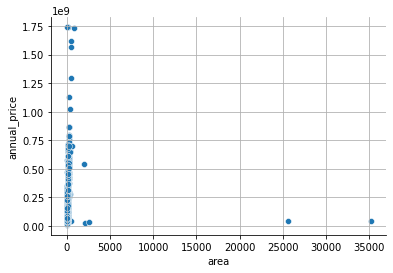

In [73]:
sns.scatterplot(df.area,df.annual_price)

In [74]:
df[(df.area>250)&(df.annual_price<0.2e9)]

,unit_name,link-href,apt_id,area,furnished,bathroom,bedroom,annual_price,region,apt_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground
97,Season City Apartment 2BR Fully Furnished,https://jendela360.com/sewa-apartemen-season-c...,sscc082,488.0,Fully Furnished,1.0,2.0,41200000.0,Jakarta Barat,Season City Apartment,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
143,Puri Orchard Apartment 1BR Fully Furnished,https://jendela360.com/sewa-apartemen-puri-orc...,pucb206,35200.0,Fully Furnished,1.0,1.0,47000000.0,Jakarta Barat,Puri Orchard Apartment,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1261,Madison Park 1BR View kolam berenang,https://jendela360.com/sewa-apartemen-madison-...,mapb040,25590.0,Fully Furnished,1.0,1.0,45000000.0,Jakarta Barat,Madison Park,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1546,Green Lake View Apartment Studio Tower C,https://jendela360.com/sewa-apartemen-green-la...,glva014,2175.0,Fully Furnished,1.0,0.0,29000000.0,Tangerang Selatan,Green Lake View Apartment,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1789,Springwood Residence Studio Fully Furnished,https://jendela360.com/sewa-apartemen-springwo...,swra056,2625.0,Fully Furnished,1.0,0.0,33000000.0,Tangerang,Springwood Residence,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


there are some mistakes in their website, the values should be changed. And also there are some extreme outliers that we have remove

In [75]:
df.loc[97,'area'] = 48.8
df.loc[143,'area'] = 35.2
df.loc[1261,'area'] = 25.6
df.loc[1546,'area'] = 21.75
df.loc[1789,'area'] = 26.25
df.drop(index=[1611,3264,3719],inplace=True,errors='ignore')

<AxesSubplot:xlabel='area', ylabel='annual_price'>

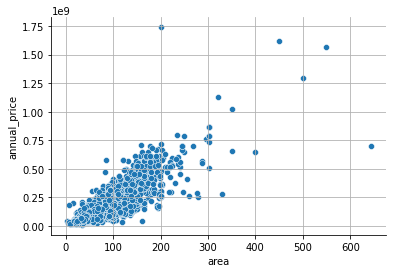

In [76]:
sns.scatterplot(df.area,df.annual_price)

In [77]:
df = df[df.annual_price!=df.annual_price.max()]

<AxesSubplot:xlabel='area', ylabel='annual_price'>

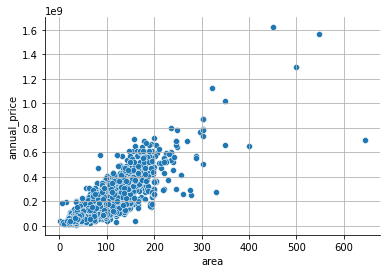

In [78]:
sns.scatterplot(df.area,df.annual_price)

## categorical data

## furnished

<AxesSubplot:xlabel='furnished', ylabel='annual_price'>

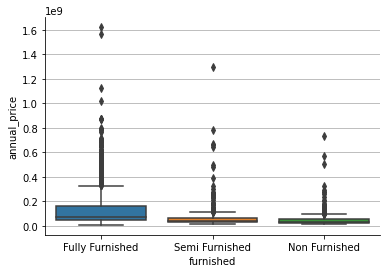

In [79]:
sns.boxplot(df.furnished,df.annual_price)

it seems like the furnished variable have order from full furnished till non-furnished, so they must be changed into numerical with encoding data to check its effect to price

## type of unit

<AxesSubplot:xlabel='annual_price', ylabel='bedroom'>

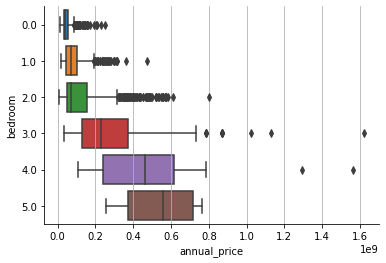

In [80]:
sns.boxplot(df.annual_price,df.bedroom,orient='h')

In [81]:
df.bedroom.value_counts()

2.0    1688
0.0     900
1.0     672
3.0     492
4.0      24
5.0       4
Name: bedroom, dtype: int64

there are just 4 for five bedrooms type. let's merge it to four's type

In [82]:
df.replace({'bedroom':{5:4}},inplace=True)

<AxesSubplot:xlabel='annual_price', ylabel='bedroom'>

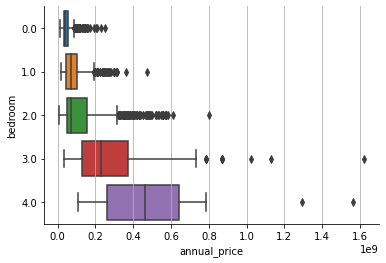

In [83]:
sns.boxplot(df.annual_price,df.bedroom,orient='h')

The graphic above seems good and makes sense. more number of bedrooms, more expensive

## Region

<AxesSubplot:xlabel='annual_price', ylabel='region'>

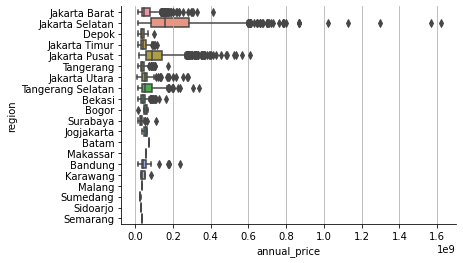

In [84]:
sns.boxplot(df.annual_price,df.region,orient='h')

In [85]:
# put jabodetabek only and group bodetabek area
df = df.set_index('region')

In [86]:
df = df.loc[df.index.value_counts().index[:12],:].drop(index=['Bandung','Surabaya'],errors='ignore')
df = df.reset_index().replace({'region':{'Tangerang':'Bodetabek',
                      'Tangerang Selatan':'Bodetabek',
                      'Bogor':'Bodetabek',
                      'Depok':'Bodetabek',
                      'Bekasi':'Bodetabek',
                     }})

<AxesSubplot:xlabel='annual_price', ylabel='region'>

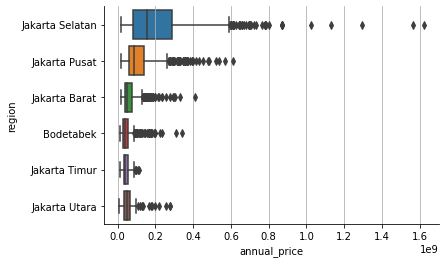

In [87]:
sns.boxplot(df.annual_price,df.region,orient='h')

check bodetabek extreme outlier

In [88]:
df[(df.region=='Bodetabek')&(df.annual_price>1.5e9)]

,region,unit_name,link-href,apt_id,area,furnished,bathroom,bedroom,annual_price,apt_name,atm,basketball_court,cable_tv,function_room,grocery_store,gym,internet,jogging_track,swimming_pool,tennis_court,laundry,restaurant,security,playground


In [89]:
df[(df.region=='Jakarta Selatan')&(df.annual_price>0.75e9)].shape

(15, 24)

1. after check the data Bodetabek, that apartment (extreme outlier )located in Bekasi and the price is also correct. But, too risky to keep this value for machine learning model. So, we're gonna remove it
2. We can take a look in Jakarta Selatan, since the number of apartments that have price more than 0.75e are just 15. So, we can take down these values for better further analysis

In [90]:
df.drop(index=df[(df.region=='Bodetabek')&(df.annual_price>1.5e9)].index,inplace=True,errors='ignore')
df.drop(df[(df.region=='Jakarta Selatan')&(df.annual_price>0.75e9)].index,inplace=True,errors='ignore')

<AxesSubplot:xlabel='annual_price', ylabel='region'>

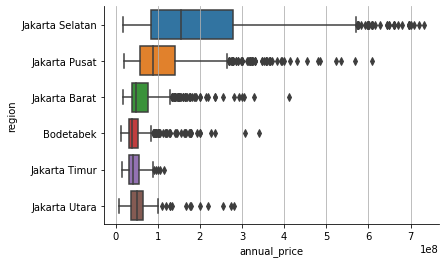

In [91]:
sns.boxplot(df.annual_price,df.region,orient='h')

In [92]:
cat = df[df.columns[6:]].drop(['bedroom','annual_price','apt_name'],axis=1)

In [93]:
# check unique values
df.nunique()

region                 6
unit_name           2328
link-href           3682
apt_id              3682
area                 252
furnished              3
bathroom               6
bedroom                5
annual_price         691
apt_name             335
atm                    2
basketball_court       2
cable_tv               2
function_room          2
grocery_store          2
gym                    2
internet               2
jogging_track          2
swimming_pool          2
tennis_court           2
laundry                2
restaurant             2
security               2
playground             2
dtype: int64

there are some variables that all apartments have those facilities. So, we can remove it

In [94]:
# df.drop(columns=df.columns[df.nunique().values==1],inplace=True)

<AxesSubplot:>

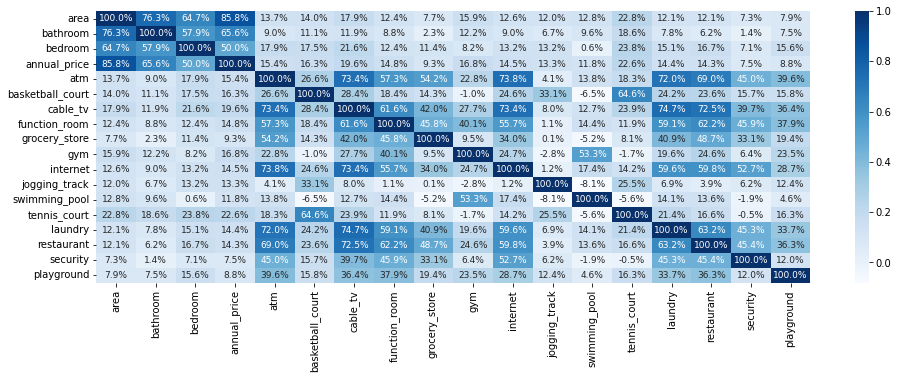

In [95]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True, fmt='.1%', annot_kws={'fontsize':9})

In [96]:
df.to_csv('D:/Data/apartment/cleaned_apartment.csv',index=False)

<AxesSubplot:xlabel='annual_price', ylabel='gym'>

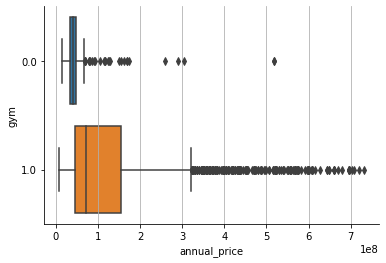

In [97]:
sns.boxplot(df.annual_price,df.gym,orient='h')